# POSTTEST 6 KB Unsupervised Learning
## Rivan Abdillah (2009106025)

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, complete

In [2]:
ds = pd.read_csv("Cleaned_Laptop_data.csv")

In [3]:
ds

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Missing,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Missing,0,No,No,38990,47990,18,0.0,0,0


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

## Hierarchical Clustering


In [12]:
points = ds.iloc[:,[17,18]].values
points

array([[ 24990,  32790],
       [ 19590,  21325],
       [ 19990,  27990],
       ...,
       [142990,      0],
       [ 38990,  47990],
       [ 57490,  78400]], dtype=int64)

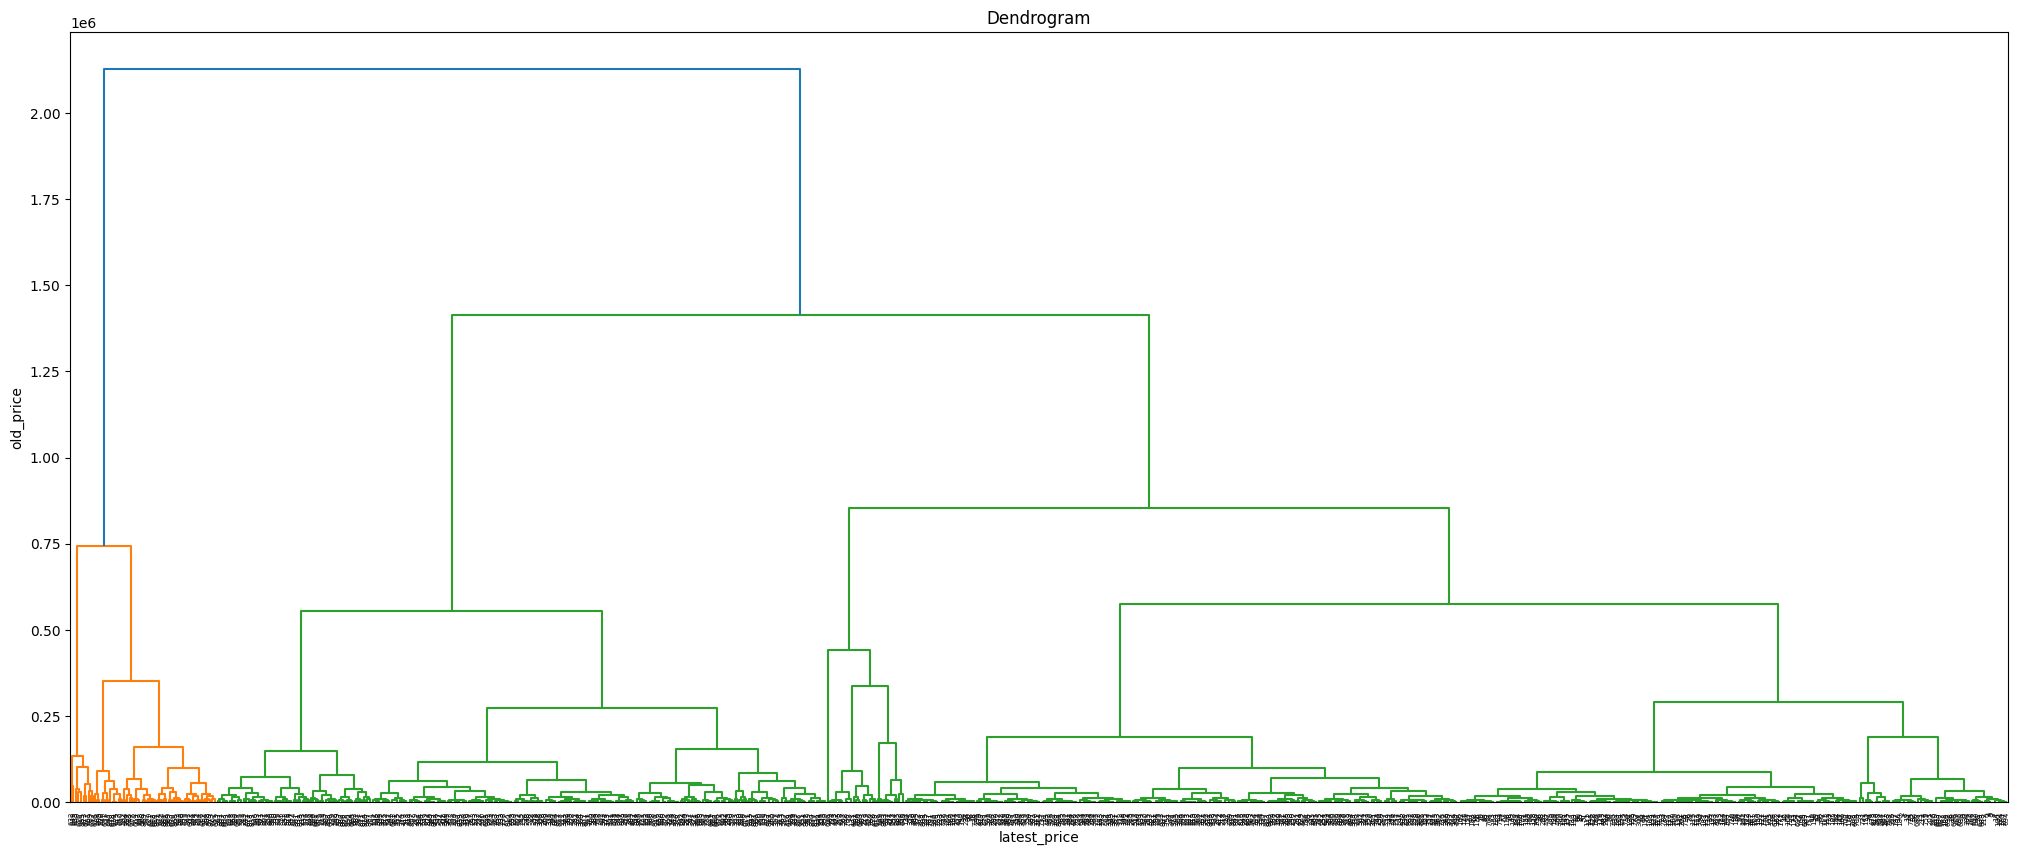

In [14]:
linkage_hieararchical = linkage(points, method='ward')
plt.figure(figsize=(25, 10), facecolor="white")
dendrogram(linkage_hieararchical)
plt.title('Dendrogram')
plt.xlabel('latest_price')
plt.ylabel('old_price')
plt.show()

## Visualisasi Hasil Model Hierarchical Clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')

In [17]:
predicted_hierachical_clustering = hierarchical_cluster.fit_predict(points)

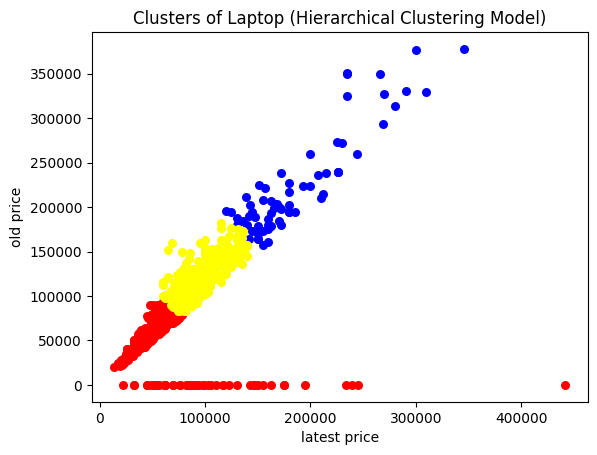

In [20]:
plt.scatter(points[predicted_hierachical_clustering==0, 0],
points[predicted_hierachical_clustering==0, 1], s=30, c='red', label ='Cluster1')
plt.scatter(points[predicted_hierachical_clustering==1, 0],
points[predicted_hierachical_clustering==1, 1], s=30, c='blue', label ='Cluster2')
plt.scatter(points[predicted_hierachical_clustering==2, 0],
points[predicted_hierachical_clustering==2, 1], s=30, c='yellow', label ='Cluster 3')
plt.title('Clusters of Laptop (Hierarchical Clustering Model)')
plt.xlabel('latest price')
plt.ylabel('old price')
plt.show()